# Planetary Data Analysis Notebook

For the first part of this script, I will solely focus on the kNN supervised learning technique applied to the data pertaining to exoplanets from NASA.

In [1]:
# Import necessary libraries
from random import seed
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from math import sqrt
#import plotly.express as px

As a resampling method, will use the train-test-split (tts) method. Will bundle the logic of tts into a function.

In [2]:
seed(12345)
def tts(data, split = 0.80):
    train = list()
    train_size = split*len(data)
    data_copy = list(data)
    while len(train) < train_size :
        index = randrange(len(data_copy))
        train.append(data_copy.pop(index))
    return np.array(train), np.array(data_copy)

In [3]:
# Assign path of data to a variable.
# Initiatiate first data frame with raw data.
path1 = 'J:\\datasets\\PS_2022.02.27_18.46.12.csv'
path2 = 'D:\\PS_2022.04.09_12.16.22.csv'
raw_data = pd.read_csv(path2, skiprows = 20)

Need to remove the first thirteen rows. These rows contain copious notes/remarks.

In [4]:
#raw_data = raw_data.drop(raw_data.index[range(14)])

In [5]:
raw_data

,pl_name,hostname,default_flag,soltype,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim
0,11 Com b,11 Com,1,Published Confirmed,326.030000,0.320000,-0.320000,0.0,0.2310,0.0050,-0.0050,0.0
1,11 UMi b,11 UMi,1,Published Confirmed,516.219970,3.200000,-3.200000,0.0,0.0800,0.0300,-0.0300,0.0
2,14 And b,14 And,1,Published Confirmed,185.840000,0.230000,-0.230000,0.0,0.0000,NaN,NaN,0.0
3,14 Her b,14 Her,1,Published Confirmed,1773.400020,2.500000,-2.500000,0.0,0.3700,0.0000,0.0000,0.0
4,16 Cyg B b,16 Cyg B,1,Published Confirmed,798.500000,1.000000,-1.000000,0.0,0.6800,0.0200,-0.0200,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5004,ups And b,ups And,1,Published Confirmed,4.617033,0.000023,-0.000023,0.0,0.0215,0.0007,-0.0007,0.0
5005,ups And c,ups And,1,Published Confirmed,241.258000,0.064000,-0.064000,0.0,0.2596,0.0079,-0.0079,0.0
5006,ups And d,ups And,1,Published Confirmed,1276.460000,0.570000,-0.570000,0.0,0.2987,0.0072,-0.0072,0.0
5007,ups Leo b,ups Leo,1,Published Confirmed,385.200000,2.800000,-1.300000,0.0,0.3200,0.1340,-0.2180,0.0


In [6]:
raw_data.columns

Index(['pl_name', 'hostname', 'default_flag', 'soltype', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim'],
      dtype='object')

Notice that the columns are not properly named. Now want to create first data frame with columns of interest.

In [7]:
#df1 = raw_data.iloc[:, [0, 1, 5]]
df1 = raw_data.loc[:, ['pl_name','pl_orbper','pl_orbeccen']]
df1.reset_index(drop=True, inplace=True)

In [8]:
df1

,pl_name,pl_orbper,pl_orbeccen
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


Need to rename the columns of interest to make analysis clearer and remove unnecessary rows.

In [9]:
df1 = df1.rename(columns={'pl_name':'planetname', 'pl_orbper':'orbitperiod', 'pl_orbeccen':'eccentricity'})
#df1 = df1.drop([0])

In [10]:
df1

,planetname,orbitperiod,eccentricity
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


Data frame 2 will remove all the NA values from original data frame.

In [11]:
df2 = df1.dropna()

In [12]:
df2

,planetname,orbitperiod,eccentricity
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


The following logic is to determine the data types of the column entries in the latest data.

In [13]:
print(type(df2.iloc[0][1])) # <- Notice the columns are strings and not numeric.
print(type(df2.iloc[0][2]))

<class 'numpy.float64'>
<class 'numpy.float64'>


Now to convert just columns "a" and "b". That is, convert the 'orbitperiod' and 'eccentricity' columns into numerics from string data types.

In [14]:
#df2.loc[:, 'orbitperiod'] = df2.loc[:, 'orbitperiod'].apply(pd.to_numeric)
#df2.loc[:, 'eccentricity'] = df2.loc[:, 'eccentricity'].apply(pd.to_numeric)

In [15]:
#x1 = df2.iloc[:, 1].apply(pd.to_numeric)
#x2 = df2.iloc[:, 2].apply(pd.to_numeric)
#x3 = df2.iloc[:,0] #<- this is the column with the column names

In [16]:
#df2_1 = pd.concat([x3,x1,x2], axis = 1)

In [17]:
df2

,planetname,orbitperiod,eccentricity
0,11 Com b,326.030000,0.2310
1,11 UMi b,516.219970,0.0800
2,14 And b,185.840000,0.0000
3,14 Her b,1773.400020,0.3700
4,16 Cyg B b,798.500000,0.6800
...,...,...,...
5004,ups And b,4.617033,0.0215
5005,ups And c,241.258000,0.2596
5006,ups And d,1276.460000,0.2987
5007,ups Leo b,385.200000,0.3200


In [18]:
print(df2.dtypes['eccentricity'])

float64


In [19]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


Dataframe 3 will take the averages of multiple planet entries. Following lines will take arithmetic mean of the two columns of interest and concate the two columns into the third dataframe.

First will create intermediate variables to store the resulting averages.

In [20]:
x4 = df2.groupby('planetname')['eccentricity'].mean()
x5 = df2.groupby('planetname')['orbitperiod'].mean()

In [21]:
x4
x5

planetname
11 Com b       326.030000
11 UMi b       516.219970
14 And b       185.840000
14 Her b      1773.400020
16 Cyg B b     798.500000
                 ...     
ups And b        4.617033
ups And c      241.258000
ups And d     1276.460000
ups Leo b      385.200000
xi Aql b       136.750000
Name: orbitperiod, Length: 1758, dtype: float64

In [22]:
type(x4)

pandas.core.series.Series

In [23]:
type(x5)

pandas.core.series.Series

In [24]:
df3 = pd.concat([x4, x5], axis = 1)
df3

,eccentricity,orbitperiod
planetname,,
11 Com b,0.2310,326.030000
11 UMi b,0.0800,516.219970
14 And b,0.0000,185.840000
14 Her b,0.3700,1773.400020
16 Cyg B b,0.6800,798.500000
...,...,...
ups And b,0.0215,4.617033
ups And c,0.2596,241.258000
ups And d,0.2987,1276.460000


In [25]:
df3['planetname'] = df3.index
df3

,eccentricity,orbitperiod,planetname
planetname,,,
11 Com b,0.2310,326.030000,11 Com b
11 UMi b,0.0800,516.219970,11 UMi b
14 And b,0.0000,185.840000,14 And b
14 Her b,0.3700,1773.400020,14 Her b
16 Cyg B b,0.6800,798.500000,16 Cyg B b
...,...,...,...
ups And b,0.0215,4.617033,ups And b
ups And c,0.2596,241.258000,ups And c
ups And d,0.2987,1276.460000,ups And d


df3 has the final version of the 'raw' data frame. Notice that at this time, dataframe 3 (df3) is not necessary. All the filtering and cleaning was handled by df2.

In [26]:
df3.columns

Index(['eccentricity', 'orbitperiod', 'planetname'], dtype='object')

    In this part want to explicitly declare the median and IQR of the two columns which are the variables.

In [27]:
ecce = df2['eccentricity']
orbper = df2['orbitperiod']
eccen_med = statistics.median(list(ecce))
orbper_med = statistics.median(list(orbper))
print('\nThe median of the orbital period: %.2f' % orbper_med)
print('\nThe median of the eccentricity: %.2f' % eccen_med)
iqr_ecce = stats.iqr(ecce, interpolation = 'midpoint')
iqr_op = stats.iqr(orbper, interpolation = 'midpoint')
print('\nThe interquartile range of the eccentricity: %.2f' % iqr_ecce)
print('\nThe interquartile range of the orbital period: %.2f' % iqr_op)


The median of the orbital period: 18.18

The median of the eccentricity: 0.09

The interquartile range of the eccentricity: 0.21

The interquartile range of the orbital period: 399.10


In [28]:
ecce_mode = statistics.mode(list(ecce))
print('The mode of the eccentricity: \n%.2f' %ecce_mode)

The mode of the eccentricity: 
0.00


In [29]:
ecce_avg = statistics.mean(list(ecce))
ecce_avg

0.15419357224118316

In [30]:
#import plotly.figure_factory as ff
#hist_data = [df2.eccentricity]
#group_labels = ['distirbution']
#fig1 = ff.create_distplot(hist_data, group_labels)
#fig1.show()

(array([894., 335., 209., 114.,  72.,  55.,  29.,  22.,  19.,   9.]),
 array([0.   , 0.095, 0.19 , 0.285, 0.38 , 0.475, 0.57 , 0.665, 0.76 ,
        0.855, 0.95 ]),
 <BarContainer object of 10 artists>)

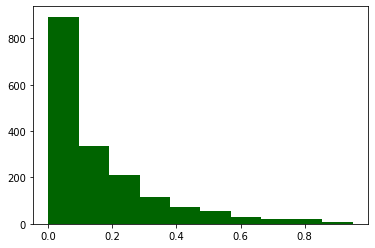

In [31]:
plt.hist(df3.eccentricity, color = "darkgreen")

The next section of code will use Robust Scaling to properly scale the dataframe. I want to use the kNN supervised learning model, but it is distance based and thus sensitive to scale of the data points.

In [32]:
x6 = df3[['orbitperiod', 'eccentricity']]
x6

,orbitperiod,eccentricity
planetname,,
11 Com b,326.030000,0.2310
11 UMi b,516.219970,0.0800
14 And b,185.840000,0.0000
14 Her b,1773.400020,0.3700
16 Cyg B b,798.500000,0.6800
...,...,...
ups And b,4.617033,0.0215
ups And c,241.258000,0.2596
ups And d,1276.460000,0.2987


In [33]:
rs = RobustScaler().fit(x6)
transformer = rs.transform(x6)

In [34]:
type(transformer)

numpy.ndarray

In [35]:
len(transformer)

1758

In [36]:
transformer

array([[ 0.76860204,  0.68780488],
       [ 1.24344198, -0.04878049],
       [ 0.4185951 , -0.43902439],
       ...,
       [ 3.14150382,  1.01804878],
       [ 0.91632949,  1.12195122],
       [ 0.296034  , -0.43902439]])

In [37]:
transformer.shape

(1758, 2)

In [38]:
X = transformer[:, 0]
y = transformer[:, 1]

Now to split the data into training and testing using the test-train-split function defined earlier in the script.

In [39]:
x_train, x_test = tts(X)
y_train, y_test = tts(y)

In [40]:
type(x_train)

numpy.ndarray

In [41]:
print(x_train)

[ 2.14755861e+01 -4.52660169e-03  1.38715049e+01 ... -3.95095648e-02
  8.14459594e-02  4.58442424e+00]


In [42]:
# Generate random predictions.
def random_algorithm(train, test):
    #output_values = [row[-1] for row in train]
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted

In [43]:
def the_real_random_algo(train_list, test_list):
    predicted = []
    for row in test_list:
        index = randrange(len(train_list))
        predicted.append(train_list[index])
    return predicted

In [44]:
list2 = list(x_train)
list3 = list(x_test)

In [45]:
type(list2)

list

In [46]:
print(list2)

[21.47558611058397, -0.004526601688726705, 13.871504858340563, -0.03860231259242797, -0.035522147120709155, -0.04003251551781092, 1.106075747554689, -0.000394597314875748, 4.00919348078798, 3.1303687111817546, -0.03563467164447663, 2.096750942383524, -0.03485329256318757, 28.9483429796419, -0.0337952364751427, 0.4464578380945622, 1.2553760919366554, 0.2903236324643962, -0.03780412299142664, 0.2610657582880853, 0.12876917520123277, -0.039753835689378486, 0.07459512080981905, 5.092744475132018, -0.03618430438435441, -0.031388899409542106, 0.052050269475886646, -0.008200930600531174, -0.03458839580300254, -0.009584417997422497, 0.026347141626181857, -0.0215095058755303, -0.039828718800066644, -0.039019058039160684, -0.030071161587388227, -0.022433819813608754, 0.4629108359119059, -0.025774906861426885, 0.7173455866805718, 11.643983666742058, 3.8444138364868126, 2.9468141740753637, 0.09214914625044796, -0.030314411295634634, 0.1398678332432996, -0.03733170399553937, 0.1922328068731887, -0.

In [47]:
list2[-1]

4.584424239075691

In [54]:
# Test the function above against the previous data.
#predictions = random_algorithm([x_train], [x_test])
predictions = the_real_random_algo(list2, list3)
predictions0 = the_real_random_algo([x_train, y_train], [x_test, y_test])
predictions02 = the_real_random_algo(y_train, y_test)
print(predictions0)
print(len(predictions0))
print((predictions02))

[array([-0.43902439,  0.21463415,  0.28292683, ..., -0.17560976,
        0.3902439 , -0.43590244]), array([-0.43902439,  0.21463415,  0.28292683, ..., -0.17560976,
        0.3902439 , -0.43590244])]
2
[0.6829268292682927, 2.424390243902439, 0.09756097560975611, 0.9756097560975608, -0.4390243902439024, 0.048780487804878085, -0.34146341463414626, 0.14634146341463414, 0.2926829268292683, -0.2195121951219512, -0.4029268292682926, -0.4390243902439024, -0.2439024390243902, -0.4390243902439024, -0.09756097560975605, 1.7819512195121947, 1.073170731707317, 0.5219512195121951, 0.048780487804878085, 0.10243902439024392, 0.024390243902439043, -0.4390243902439024, -0.38341463414634147, 0.2926829268292683, 0.39024390243902446, 1.0146341463414632, -0.4390243902439024, -0.4390243902439024, -0.4390243902439024, -0.36926829268292677, -0.4390243902439024, 0.8439024390243902, 1.5121951219512197, -0.4390243902439024, -0.14634146341463414, 0.2926829268292683, -0.4390243902439024, 2.3073170731707315, -0.4390

In [49]:
print(predictions)

[0.058690140142840484, 3.1303687111817546, 0.01548416840869127, 2.7651071663141678, -0.005267605762503942, -0.03288759524107399, -0.0286842662478534, 0.1127291251591528, 4.281329560012635, -0.033955629984911924, 2.0692876683333297, 0.043122208748296136, -0.03736251154737049, -0.031980857798387656, 0.308217703170992, -0.032972901163596455, 1.4452828843308567, -0.021027056043629255, 0.9050945147328108, -0.03605833009662004, 3.063857654754738, -0.01428821148199042, -0.0415176687095764, 0.2610657582880853, 4.810621750798202, 39.90119600311494, 79.84777643976153, -0.0398799445471557, -0.011718204538026408, 0.01860644306884511, 8.637424263468072, 1.0381665608123898, 8.69617569664527, -0.03847676073978171, 0.6757062698979224, -0.03452560477187869, -0.03713948903979431, 0.13921870131120406, 0.9024230871661101, -0.03687372731130977, -0.023404302012026864, -0.02036376804209151, 0.07811116888662714, -0.037082354444460286, 7.0326502875866685, 39.90119600311494, 3.2327318235506617, 10.7476822681947

In [50]:
train = [[0], [1], [0], [1], [0], [1]]
test = [[None], [None], [None], [None]]
predictions00 = the_real_random_algo(train, test)
print(predictions00)

[[1], [0], [1], [1]]


In [52]:
#predictions01 = the_real_random_algo(x_train, x_test)
#some_mse = mean_squared_error(y_test, predictions0)
#print(some_mse)

In [55]:
# Will name the performance metrics for the prediction set as "some" so as to imply generality.
some_mse = mean_squared_error(y_train,predictions02)
#some_r2 = r2_score(w2_train, y_svr_train_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1407, 351]

Did calculations on the training and testing lists before converting them to a dataframe.

In [ ]:
x_train, y_train = pd.DataFrame(x_train), pd.DataFrame(y_train)
x_test, y_test = pd.DataFrame(x_test), pd.DataFrame(y_test)
print('\nTraining x shape: ', x_train.shape)
print('Training y shape: ', y_train.shape)
print('Test x shape: ', x_test.shape)
print('Test y shape: ', y_test.shape)

Want to establish a baseline to compare to the ML model against. Will create a funciton using the Random Prediction Algorithm.

Will run kNN for various values of n_neighbors and store results.

In [ ]:
knn_r_acc = []
for j in range(1, 60, 1):
    knn = KNeighborsRegressor(n_neighbors = j)
    knn.fit(x_train, y_train)
    
    test_score = knn.score(x_test, y_test)
    train_score = knn.score(x_train, y_train)
    
    knn_r_acc.append((j, test_score, train_score))
   
results = pd.DataFrame(knn_r_acc, columns = ['k', 'Test Score', 'Train Score'])
print(results)
print(results.iloc[:,1].max())

According to the results above, k = 29 seems to be the best k. What is concerning is that I feel if I extended the 'for' loop to a higher value, perhaps I would see a better performing k value.

Now, by adjusting the range of for loop to 45, found the optimal k to be k = 40.

Will now create the kNN model.

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors = 40)
model_knn.fit(x_train, y_train)
y_knn_train_pred = model_knn.predict(x_train)
y_knn_test_pred = model_knn.predict(x_test)

For model performace, first the training mean square error and R2 score.

In [ ]:
knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)
# Now, test mean square and r2 score.
knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)
# Consolidate the results.
knn_results = pd.DataFrame(['k Nearest Neighbor', knn_train_mse, knn_train_r2, knn_test_mse, knn_test_r2]).transpose()
#results1 = pd.DataFrame(columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
results1 = pd.DataFrame()
results1 = pd.concat([results1, knn_results])
print(results1)
#knn_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
#print(knn_results)

In [ ]:
len(y_knn_test_pred)

In [ ]:
len(y_test)

In [ ]:
true_values = y_test
predicted_values = y_knn_test_pred
plt.figure(figsize = (9,9))
plt.scatter(true_values, predicted_values, c = 'crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_values), max(true_values))
p2 = min(min(predicted_values), min(true_values))
#plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('True Values', fontsize = 10)
plt.ylabel('Predictions', fontsize = 10)
plt.axis('equal')
plt.show()
plt.close()

In [ ]:
g = plt.plot(true_values - predicted_values, marker = 'o', linestyle = '')

In [ ]:
#from yellowbrick.regressor import prediction_error
#model = Lasso()
#visualizer = prediciton_error(model, x_train, y_train, x_test, y_test)

In [ ]:
#Set plot size
#plt.subplots(figsize=(10,5))
#Set X-Axis range
#plt.xlim(min(true_values), max(true_values))
#plt.title('Model Error Distribution')
#plt.ylabel('No. of Predictions')
#plt.xlabel('Error')
#plt.hist(predictions['error'], bins=np.linspace(min(test_values), max(test_values), num=41, dtype=int));
#plt.show()

In [ ]:
residuals = true_values - predicted_values
plt.scatter(true_values, residuals)


There is an obvious positive linear relationship which indicates that the kNN model is not best supervised learning model for this data.

In [ ]:
w1 = x6.iloc[:, 0:1].values
w2 = x6.iloc[:, 1:2].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
w3 = sc_X.fit_transform(w1)
w4 = sc_y.fit_transform(w2)
w1_train, w1_test = tts(w3)
w2_train, w2_test = tts(w4)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(w1_train, w2_train)
y_svr_train_pred = regressor.predict(w1_train)
y_svr_test_pred = regressor.predict(w1_test)
# Model performance
svr_train_mse = mean_squared_error(w2_train, y_svr_train_pred)
svr_train_r2 = r2_score(w2_train, y_svr_train_pred)
# Test results
svr_test_mse = mean_squared_error(w2_test, y_svr_test_pred)
svr_test_r2 = r2_score(w2_test, y_svr_test_pred)
# Consolidate the results.
#svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2]).T
svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2])
#results2 = pd.concat([knn_results, svr_results.T], ignore_index = False)
#print(results2)

In [ ]:
results2 = pd.concat([knn_results,svr_results.T], ignore_index = True)
results2.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
results2

Now want to model using Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

The line above should be moved to the top of the script.

In [ ]:
rf = RandomForestRegressor(max_depth=2)
rf.fit(w1_train, w2_train)
print(rf)

Now going to apply the constructed model to make predictions on the training and testing sets.

In [ ]:
y_rf_train_pred = rf.predict(w1_train)
y_rf_test_pred = rf.predict(w1_test)

In [ ]:
# Model performance metrics for random forest model.
rf_train_mse = mean_squared_error(w2_train, y_rf_train_pred)
rf_train_r2 = r2_score(w2_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(w2_test, y_rf_test_pred)
rf_test_r2 = r2_score(w2_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
results2 = pd.concat([results2, rf_results], ignore_index = True)
results2

Will now study the relationship between planet mass and temperature.

In [ ]:
path3 = 'D:\\PS_2022.04.14_19.39.14.csv'
raw_data2 = pd.read_csv(path3, skiprows = 28) #  <- notice had to skip first 29 lines.

In [ ]:
print(raw_data2)
raw_data2.columns

In [ ]:
type(raw_data2) #<- already a pandas data frame.

In [ ]:
df4 = raw_data2.loc[:, ['pl_name','pl_bmassj','pl_eqt']]
df4.reset_index(drop=True, inplace=True)

In [ ]:
df4

In [ ]:
df4 = df4.rename(columns={'pl_name':'planetname','pl_bmassj':'planetmass', 'pl_eqt':'temperature'})
df4 = df4.dropna()

In [ ]:
df4

In [ ]:
print(type(df4.iloc[0][1]))
print(type(df4.iloc[0][2]))

Notice both of the above are float data type which will make computation easier.

In [ ]:
df4.reset_index(drop=True, inplace=True)

In [ ]:
df4

In [ ]:
x7 = df4.groupby('planetname')['planetmass'].mean()
x8 = df4.groupby('planetname')['temperature'].mean()
x8

In [ ]:
df5 = pd.concat([x7, x8], axis = 1)
df5

In [ ]:
mass = df5['planetmass']
temp = df5['temperature']
mass_med = statistics.median(list(mass))
temp_med = statistics.median(list(temp))
print('\nThe median of the planet mass: %.2f' % mass_med)
print('\nThe median of the temperature: %.2f' % temp_med)
iqr_mass = stats.iqr(mass, interpolation = 'midpoint')
iqr_temp = stats.iqr(temp, interpolation = 'midpoint')
print('\nThe interquartile range of the planet mass: %.2f' % iqr_mass)
print('\nThe interquartile range of the temperature: %.2f' % iqr_temp)
print(statistics.mean(list(mass)))

In [ ]:
plt.hist(df5.planetmass, density = True, color = "darkorange")

In [ ]:
plt.hist(df5.temperature, color = "navy")

Note that the trend in this distribution is not as skewed as the other metrics. That is, it more closely resembles a normal distribution.

In [ ]:
x9 = df5[['planetmass', 'temperature']]

In [ ]:
x9

In [ ]:
rs2 = RobustScaler().fit(x9)
transformer2 = rs2.transform(x9)
print(type(transformer2))
len(transformer2)

In [ ]:
x10 = transformer2[:, 0]
y2 = transformer2[:, 1]

In [ ]:
x_train2, x_test2 = tts(x10)
y_train2, y_test2 = tts(y2)

In [ ]:
type(x_train2)

Need to convert the above from Pandas dataframes to numpy ndarrays for the Random Prediction Algorithm.

In [ ]:
#x_train2.to_numpy
#x_test2.to_numpy
#y_train2.to_numpy
#y_test2.to_numpy

In [ ]:
#predictions2 = random_algorithm([x_train2], [x_test2])
predictions2 = the_real_random_algo(y_train2, y_test2)
#predictions2 = random_algorithm([x_train2, y_train2], [x_test2, y_test2])
print(predictions2)

In [ ]:
x_train2, y_train2 = pd.DataFrame(x_train2), pd.DataFrame(y_train2)
x_test2, y_test2 = pd.DataFrame(x_test2), pd.DataFrame(y_test2)
print('\nTraining x2 shape: ', x_train2.shape)
print('Training y2 shape: ', y_train2.shape)
print('Test x2 shape: ', x_test2.shape)
print('Test y2 shape: ', y_test2.shape)

In [ ]:
knn_r_acc2 = []
for n in range(1, 60, 1):
    knn2 = KNeighborsRegressor(n_neighbors = n)
    knn2.fit(x_train2, y_train2)
    
    test_score2 = knn2.score(x_test2, y_test2)
    train_score2 = knn2.score(x_train2, y_train2)
    
    knn_r_acc2.append((n, test_score2, train_score2))
   
outcome = pd.DataFrame(knn_r_acc2, columns = ['k', 'Test Score', 'Train Score'])
print(outcome)
print(outcome.iloc[:,1].max())

The maximum test score for this kNN model occurs when k = 15.
Will not create the second kNN model to help describe the relationship betweeen mass and temperature.

In [ ]:
model_knn2 = KNeighborsRegressor(n_neighbors = 15)
model_knn2.fit(x_train2, y_train2)
y_knn_train_pred2 = model_knn2.predict(x_train2)
y_knn_test_pred2 = model_knn2.predict(x_test2)

In [ ]:
knn_train_mse_2 = mean_squared_error(y_train2, y_knn_train_pred2)
knn_train_r2_2 = r2_score(y_train2, y_knn_train_pred2)
# Now, test mean square and r2 score.
knn_test_mse_2 = mean_squared_error(y_test2, y_knn_test_pred2)
knn_test_r2_2 = r2_score(y_test2, y_knn_test_pred2)
# Consolidate the results.
knn_results2 = pd.DataFrame(['k Nearest Neighbor', knn_train_mse_2, knn_train_r2_2, knn_test_mse_2, knn_test_r2_2]).transpose()
results3 = pd.DataFrame()
results3 = pd.concat([results3, knn_results2])
print(results2)

In [ ]:
true_values2 = y_test2
predicted_values2 = y_knn_test_pred2
plot2 = plt.figure(figsize=(8,8))
plot2 =plt.scatter(true_values2, predicted_values2, c = 'lime')

residuals2 = true_values2 - predicted_values2
plot2 = plt.scatter(true_values2, residuals2)

plt.axis('equal')
plt.show(plot2)

Notice no pattern so model does describe the data.

In [ ]:
w5 = x9.iloc[:, 0:1].values
w6 = x9.iloc[:, 1:2].values
sc2_X = StandardScaler()
sc2_y = StandardScaler()
w7 = sc2_X.fit_transform(w5)
w8 = sc2_y.fit_transform(w6)
w3_train, w3_test = tts(w7)
w4_train, w4_test = tts(w7)

In [ ]:
type(w3_train)

In [ ]:
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(w3_train, w4_train)
y_svr_train_pred2 = regressor2.predict(w3_train)
y_svr_test_pred2 = regressor2.predict(w3_test)
# Model performance
svr_train_mse_2 = mean_squared_error(w4_train, y_svr_train_pred2)
svr_train_r2_2 = r2_score(w4_train, y_svr_train_pred2)
# Test results
svr_test_mse_2 = mean_squared_error(w4_test, y_svr_test_pred2)
svr_test_r2_2 = r2_score(w4_test, y_svr_test_pred2)
# Consolidate the results.
#svr_results = pd.DataFrame(['SVR', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2]).T
svr_results2 = pd.DataFrame(['SVR', svr_train_mse_2, svr_train_r2_2, svr_test_mse_2, svr_test_r2_2])
#results2 = pd.concat([knn_results, svr_results.T], ignore_index = False)
#print(results2)

In [ ]:
results3 = pd.concat([knn_results2,svr_results.T], ignore_index = True)
results3.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
results3

Now to add the Random Forest Regressor.

In [ ]:
rf2 = RandomForestRegressor(max_depth=2)
rf2.fit(w3_train, w4_train)
y_rf_train_pred2 = rf2.predict(w3_train)
y_rf_test_pred2 = rf2.predict(w3_test)

In [ ]:
some_prediction = random_algorithm(w3_train, w3_test)
print(some_prediction)

In [ ]:
some_r2 = r2_score(w3_test, some_prediction)
print(some_r2)

In [ ]:
# Model performance metrics for random forest model.
rf2_train_mse = mean_squared_error(w4_train, y_rf_train_pred2)
rf2_train_r2 = r2_score(w4_train, y_rf_train_pred2)
rf2_test_mse = mean_squared_error(w4_test, y_rf_test_pred2)
rf2_test_r2 = r2_score(w4_test, y_rf_test_pred2)

In [ ]:
rf_results2 = pd.DataFrame(['Random Forest', rf2_train_mse, rf2_train_r2, rf2_test_mse, rf2_test_r2]).transpose()
rf_results2.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
results3 = pd.concat([results3, rf_results2], ignore_index = True)
results3

Random Forest model seems to be the best performing of the trio in this scenario. Still need to do further exploraiton of the interpretation of the R2 value.

In [ ]:
rf2_rmse = sqrt(rf2_test_mse)
print('The Random Forest 2 model RMSE is: ', rf2_rmse)